# Organizing data by variables of interest

Brainstorming how to organize all this data. One way to conceptualize is that there are categories of attributes that we are interested in: Student, teacher, and neighborhood; and several geographic scales at which we can observe them.

# Attributes of interest:

### Student attributes
- grades (outcomes)
- racial and gender summary statistics
- achievement data
    - grades
    - AP testing, SAT/ACT prep, other college prep metrics
    - discipline
    - harassment/bullying
    - absenteeism

### Teacher attributes
- amount of pay
- teachers per student
- support staff make up

### Neighborhood attributes
- locales (NCES)
- congressional district
- state congresional districts (lower and upper houses)
- census/acs economic indicators
- Reardon variables

# Observable geographic scales
by **decreasing** resolution

### School
- locations (we have adresses that can be geocoded to point data)

### School District
- geometries (shapefiles)

### Counties
- to view school districts in the aggregate

### Geographic locale classifications (NCES)
- distinguish between rural and urban (and everything in between)

### Legislative boundaries
- could provide qualitative insight in terms of funding or other policy decisions
- by US congressional districts or state upper and lower houses

# Create workflow: investigate California

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

## California school district shapes

In [2]:
shapes = gpd.read_file("SEDA_files/2013_Unified_Elementary_SD.shp")

note the data year of **2013**. School district boundaries can change over time, so it is important to match the data years for by attributes and geographies.

In [3]:
shapes.head()

,STATEFP,UNSDLEA,GEOID,NAME,dType,ELSDLEA,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,FIPSCODE,FIPSNUM,LABEL,TYPE,DCODE,ISD,CNTY_CODE,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,geometry
0,10,00080,1000080,Appoquinimink School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"MULTIPOLYGON (((-75.78383 39.59048, -75.78361 ..."
1,10,00170,1000170,Cape Henlopen School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-75.41569 38.75789, -75.41564 38.757..."
2,10,00180,1000180,Caesar Rodney School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-75.74426 39.09967, -75.74411 39.099..."
3,10,00190,1000190,Capital School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-75.75100 39.18365, -75.74723 39.185..."
4,10,00200,1000200,Christina School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"MULTIPOLYGON (((-75.58429 39.73921, -75.58418 ..."


In [4]:
ca = shapes.loc[shapes['STATEFP'] == '06']
#select state by fips code

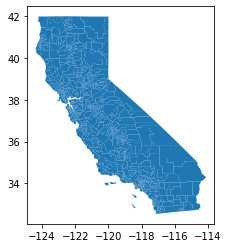

In [5]:
ca.plot()
#neat

In [6]:
ca.shape

(880, 30)

In [7]:
ca.head()
#looking to match on UNSDLEA or GEOID. NAME is possible but not ideal.

,STATEFP,UNSDLEA,GEOID,NAME,dType,ELSDLEA,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,FIPSCODE,FIPSNUM,LABEL,TYPE,DCODE,ISD,CNTY_CODE,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,geometry
7378,06,00001,0600001,Acton-Agua Dulce Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-118.38010 34.50369, -118.37724 34.5..."
7379,06,00009,0600009,Cuyama Joint Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-120.09299 35.10463, -120.09299 35.1..."
7380,06,00011,0600011,Fort Sage Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-120.30179 40.14514, -120.29604 40.1..."
7381,06,00013,0600013,Rocklin Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-121.30056 38.79509, -121.30056 38.7..."
7382,06,00014,0600014,Hesperia Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-117.43988 34.35421, -117.43935 34.3..."


## Import attribute data

In [8]:
from json import loads
from urllib.request import urlopen

In [32]:
layer = "ccd"
sublayer = "directory"
year = "2013"
fips = "06"
county_code = "6065"

In [33]:
dynurl = f"https://educationdata.urban.org/api/v1/school-districts/{layer}/{sublayer}/{year}?fips={fips}?county_code={county_code}"

In [35]:
response = urlopen(dynurl)
data = loads(response.read())

HTTPError: HTTP Error 400: Bad Request

In [36]:
data

{'count': 18785,
 'next': 'https://educationdata.urban.org/api/v1/school-districts/ccd/directory/2013/?county_code=6065&page=2',
 'previous': None,
 'results': [{'year': 2013,
   'leaid': '0100002',
   'lea_name': 'ALABAMA YOUTH SERVICES',
   'fips': 1,
   'state_leaid': '210',
   'street_mailing': 'P O BOX 66',
   'city_mailing': 'MT MEIGS',
   'state_mailing': 'AL',
   'zip_mailing': '36057',
   'zip4_mailing': '0066',
   'street_location': '1000 INDUSTRIAL SCHOOL ROAD',
   'city_location': 'MT. MEIGS',
   'state_location': 'AL',
   'zip_location': '36057',
   'zip4_location': '0066',
   'phone': '3342153850',
   'latitude': 32.376999,
   'longitude': -86.083,
   'urban_centric_locale': 21,
   'cbsa': 33860,
   'cbsa_type': 1,
   'csa': -2,
   'cmsa': None,
   'necta': None,
   'county_code': '1101',
   'county_name': 'MONTGOMERY COUNTY',
   'congress_district_id': 103,
   'bureau_indian_education': 0,
   'supervisory_union_number': '000',
   'agency_type': 1,
   'agency_level': None

In [ ]:
df = pd.DataFrame.from_dict(data)
dfdict = dict(df['results'])
df = pd.DataFrame.from_dict(dfdict, orient='index')

In [29]:
df.shape
# can't be sure if this is exhaustive

(1000, 67)

In [30]:
df['fips'].dtype
# this should be a string

dtype('int64')

In [31]:
df

,year,leaid,lea_name,fips,state_leaid,street_mailing,city_mailing,state_mailing,zip_mailing,zip4_mailing,street_location,city_location,state_location,zip_location,zip4_location,phone,latitude,longitude,urban_centric_locale,cbsa,cbsa_type,csa,cmsa,necta,county_code,county_name,congress_district_id,bureau_indian_education,supervisory_union_number,agency_type,agency_level,boundary_change_indicator,agency_charter_indicator,lowest_grade_offered,highest_grade_offered,number_of_schools,enrollment,spec_ed_students,english_language_learners,migrant_students,teachers_prek_fte,teachers_kindergarten_fte,teachers_elementary_fte,teachers_secondary_fte,teachers_ungraded_fte,teachers_total_fte,instructional_aides_fte,coordinators_fte,guidance_counselors_elem_fte,guidance_counselors_sec_fte,guidance_counselors_other_fte,guidance_counselors_total_fte,librarian_specialists_fte,librarian_support_staff_fte,lea_administrators_fte,lea_admin_support_staff_fte,school_administrators_fte,school_admin_support_staff_fte,support_staff_students_fte,support_staff_other_fte,staff_total_fte,lea_staff_total_fte,other_staff_fte,school_staff_total_fte,school_counselors_fte,state_leg_district_lower,state_leg_district_upper
0,2013,0100002,ALABAMA YOUTH SERVICES,1,210,P O BOX 66,MT MEIGS,AL,36057,0066,1000 INDUSTRIAL SCHOOL ROAD,MT. MEIGS,AL,36057,0066,3342153850,32.376999,-86.083000,21,33860,1,-2,None,None,1101,MONTGOMERY COUNTY,103,0,000,1,None,1,3,3,12,7,-1,45,-1,None,0,0,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,None,None,,
1,2013,0100005,ALBERTVILLE CITY,1,101,107 WEST MAIN ST,ALBERTVILLE,AL,35950,0025,107 WEST MAIN ST,ALBERTVILLE,AL,35950,0025,2568911183,34.267502,-86.208603,32,10700,2,290,None,None,1095,MARSHALL COUNTY,104,0,000,1,None,1,3,-1,12,6,4713,316,549,None,5,26,164,64,-2,259,23,3,5,4,0,9,7,1,6,12,31,15,-3,-3,None,None,None,None,None,,
2,2013,0100006,MARSHALL COUNTY,1,048,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976,9351,12380 US HWY 431 SOUTH,GUNTERSVILLE,AL,35976,9351,2565823171,34.305000,-86.286697,42,10700,2,290,None,None,1095,MARSHALL COUNTY,104,0,000,1,None,1,3,-1,12,16,5604,679,292,None,6,38,203,112,-2,359,34,9,9,6,0,15,13,0,4,7,38,15,-3,-3,None,None,None,None,None,,
3,2013,0100007,HOOVER CITY,1,158,2810 METROPOLITAN WAY,HOOVER,AL,35243,5500,2810 METROPOLITAN WAY,HOOVER,AL,35243,5500,2054391015,33.406200,-86.766899,13,13820,1,142,None,None,1073,JEFFERSON COUNTY,106,0,000,1,None,1,3,0,12,17,13943,1079,508,None,0,93,515,329,-2,938,89,8,19,11,0,30,19,14,5,13,84,66,-3,-3,None,None,None,None,None,,
4,2013,0100008,MADISON CITY,1,169,211 CELTIC DRIVE,MADISON,AL,35758,1615,211 CELTIC DR,MADISON,AL,35758,1615,2564648370,34.687302,-86.744904,21,26620,1,290,None,None,1089,MADISON COUNTY,105,0,000,1,None,1,3,-1,12,11,9554,963,243,None,9,47,292,181,-2,529,71,12,7,10,0,17,13,11,10,13,45,13,27,250,None,None,None,None,None,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2013,0500057,NATIONAL PARK TECHNOLOGY CENTER,5,2622000,P O BOX 3950,HOT SPRINGS,AR,71914,,101 COLLEGE DR,HOT SPRINGS,AR,71913,,5017679314,34.512798,-93.120903,23,26300,1,284,None,None,5051,GARLAND COUNTY,504,0,000,8,None,1,3,9,12,1,0,0,0,None,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0,0,0,0,None,None,None,None,None,,
996,2013,0500058,SALINE COUNTY VOCATIONAL CENTER,5,6322000,3201 S REYNOLDS RD,BAUXITE,AR,72011,,3201 SOUTH REYNOLDS RD,BAUXITE,AR,72011,,5016022420,34.564400,-92.494102,41,30780,1,340,None,None,5125,SALINE COUNTY,502,0,000,8,None,1,3,9,12,1,0,0,0,None,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0,0,0,0,None,None,None,None,None,,
997,2013,0500059,ACADEMICS PLUS CHARTER SCHOOL,5,6040700,900 EDGEWOOD DR,MAUMELLE,AR,72113,6275,900 EDGEWOOD DR,MAUMELLE,AR,72113,6275,5018513333,34.865299,-92.405800,21,30780,1,340,None,None,5119,PULASKI COUNTY,502,0,000,7,None,1,1,0,12,2,

## Merge Logic

In [16]:
df.iloc[0]

year                                                     2013
leaid                                                 0600001
lea_name                             ACTON-AGUA DULCE UNIFIED
fips                                                        6
state_leaid                                           1975309
street_mailing                      32248 N. CROWN VALLEY RD.
city_mailing                                            ACTON
state_mailing                                              CA
zip_mailing                                             93510
zip4_mailing                                             2620
street_location                   32248 NORTH CROWN VALLEY RD
city_location                                           ACTON
state_location                                             CA
zip_location                                            93510
zip4_location                                            2620
phone                                              6612695999
latitude

In [17]:
ca.iloc[0]

STATEFP                                                     06
UNSDLEA                                                  00001
GEOID                                                  0600001
NAME                  Acton-Agua Dulce Unified School District
dType                                                  Unified
ELSDLEA                                                   None
LSAD                                                      None
LOGRADE                                                   None
HIGRADE                                                   None
MTFCC                                                     None
SDTYP                                                     None
FUNCSTAT                                                  None
ALAND                                                        0
AWATER                                                       0
INTPTLAT                                                  None
INTPTLON                                               

These both refer to the same district - we might be able to merge on GEOID. `df['leaid']` and `ca['UNSDLEA']` might be identical if we lop off the FIPS prefix (06) from `df['leaid']`

In [18]:
df['leaid2'] = df['leaid'].str[2:]

In [19]:
df['leaid2']

0      00001
1      00002
2      00003
3      00006
4      00007
       ...  
995    37140
996    37200
997    37230
998    37260
999    37290
Name: leaid2, Length: 1000, dtype: object

### using sets to check compatibility 

In [20]:
dflea = set(df['leaid']) # option 1
dflea2 = set(df['leaid2']) # option 2 
shapelea = set(shapes['GEOID']) # option 1
shapelea2 = set(shapes['UNSDLEA']) #option 2

In [21]:
len(dflea.intersection(shapelea))

757

In [22]:
len(shapelea.difference(dflea))

12285

In [23]:
len(dflea2.intersection(shapelea2))
#863 > 757 but does it match?

863

In [24]:
len(shapelea2.difference(dflea2))

2360

### option 1

In [25]:
ca = pd.DataFrame(ca)
m = ca.merge(df, left_on='GEOID', right_on='leaid')

In [26]:
m.shape

(757, 98)

In [27]:
m.head()

,STATEFP,UNSDLEA,GEOID,NAME,dType,ELSDLEA,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,FIPSCODE,FIPSNUM,LABEL,TYPE,DCODE,ISD,CNTY_CODE,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,geometry,year,leaid,lea_name,fips,state_leaid,street_mailing,city_mailing,state_mailing,zip_mailing,zip4_mailing,street_location,city_location,state_location,zip_location,zip4_location,phone,latitude,longitude,urban_centric_locale,cbsa,cbsa_type,csa,cmsa,necta,county_code,county_name,congress_district_id,bureau_indian_education,supervisory_union_number,agency_type,agency_level,boundary_change_indicator,agency_charter_indicator,lowest_grade_offered,highest_grade_offered,number_of_schools,enrollment,spec_ed_students,english_language_learners,migrant_students,teachers_prek_fte,teachers_kindergarten_fte,teachers_elementary_fte,teachers_secondary_fte,teachers_ungraded_fte,teachers_total_fte,instructional_aides_fte,coordinators_fte,guidance_counselors_elem_fte,guidance_counselors_sec_fte,guidance_counselors_other_fte,guidance_counselors_total_fte,librarian_specialists_fte,librarian_support_staff_fte,lea_administrators_fte,lea_admin_support_staff_fte,school_administrators_fte,school_admin_support_staff_fte,support_staff_students_fte,support_staff_other_fte,staff_total_fte,lea_staff_total_fte,other_staff_fte,school_staff_total_fte,school_counselors_fte,state_leg_district_lower,state_leg_district_upper,leaid2
0,06,00001,0600001,Acton-Agua Dulce Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-118.38010 34.50369, -118.37724 34.5...",2013,0600001,ACTON-AGUA DULCE UNIFIED,6,1975309,32248 N. CROWN VALLEY RD.,ACTON,CA,93510,2620,32248 NORTH CROWN VALLEY RD,ACTON,CA,93510,2620,6612695999,34.471802,-118.197197,41,31080,1,348,None,None,6037,LOS ANGELES COUNTY,625,0,000,1,None,1,2,0,12,6,2383,242,189,None,-1,6,53,33,1,94,14,3,0,0,0,0,0,-1,0,7,6,13,4,40,None,None,None,None,None,,,00001
1,06,00009,0600009,Cuyama Joint Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-120.09299 35.10463, -120.09299 35.1...",2013,0600009,CUYAMA JOINT UNIFIED,6,4275010,2300 HIGHWAY 166,NEW CUYAMA,CA,93254,0271,2300 HWY 166,NEW CUYAMA,CA,93254,0271,6617662482,34.932701,-119.609200,43,42200,1,-2,None,None,6083,SANTA BARBARA COUNTY,624,0,000,1,None,1,3,0,12,3,246,0,109,None,-1,1,8,6,0,15,4,0,0,0,0,0,0,-1,1,2,0,2,0,6,None,None,None,None,None,,,00009
2,06,00011,0600011,Fort Sage Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-120.30179 40.14514, -120.29604 40.1...",2013,0600011,FORT SAGE UNIFIED,6,1875036,PO BOX 35,HERLONG,CA,96113,0035,100 DS HALL ST,HERLONG,CA,96113,0035,5308272129,40.141899,-120.134003,43,45000,2,-2,None,None,6035,LASSEN COUNTY,601,0,000,1,None,1,2,0,12,6,295,0,3,None,-1,1,6,9,0,17,1,0,0,0,0,0,0,-1,0,0,0,3,0,4,None,None,None,None,None,,,00011
3,06,00013,0600013,Rocklin Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-121.30056 38.79509, -121.30056 38.7...",2013,0600013,ROCKLIN UNIFIED,6,3175085,2615 SIERRA MEADOWS DR.,ROCKLIN,CA,95677,2811,2615 SIERRA MEADOWS DR,ROCKLIN,CA,95677,2811,9166242428,38.791801,-121.222504,21,40900,1,472,None,None,6061,PLACER COUNTY,604,0,000,1,None,1,2,0,12,21,12162,1179,542,None,-1,40,302,167,3,513,167,3,0,5,1,6,0,-1,4,26,28,60,39,159,None,None,None,None,None,,,00013
4,06,00014,0600014,Hesperia Unified School District,Unified,None,None,None,None,None,None,None,0,0,None,None,None,0,None,None,None,None,None,0.0,0.0,0.0,None,None,None,"POLYGON ((-117.43988 34.35421, -117.43935 34.3...",2013,0600014,HESPERIA UNIFIED,6,3675044,15576 MAIN ST.,HESPERIA,CA,92345,3482,15576 MAIN ST,HESPERIA,CA,92345,3482,7602444411,34.424702,-11

In [28]:
gdf = gpd.GeoDataFrame(m, geometry='geometry')

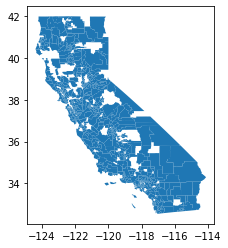

In [29]:
gdf.plot()

### option 2

In [30]:
m2 = ca.merge(df, left_on='UNSDLEA', right_on='leaid2')

In [31]:
gdf2 = gpd.GeoDataFrame(m2, geometry='geometry')

In [32]:
gdf2.shape
#worse

(294, 98)

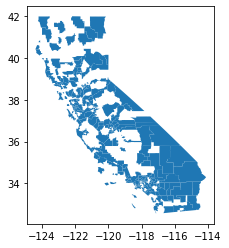

In [33]:
gdf2.plot()

we obviously prefer option one in terms of merging compatibility, but there are still district shapefiles without any attribute data. 